In [26]:
%matplotlib inline


import nibabel as nib
import os
import matplotlib as mpl 
import matplotlib.pyplot as plt 
import numpy as np


In [6]:
si2_img = nib.load(os.path.join('..', 'zmeta_rocs', 'pre', 'scaled', 'varcopes.nii.gz'))
tau2_img = nib.load(os.path.join('..', 'zmeta_rocs', 'results', 'megaMFX', 'stats', 'mean_random_effects_var1.nii.gz'))

In [9]:
si2 = si2_img.get_data()
si2.shape

(91, 109, 91, 21)

In [10]:
tau2=tau2_img.get_data()
tau2.shape

(91, 109, 91)

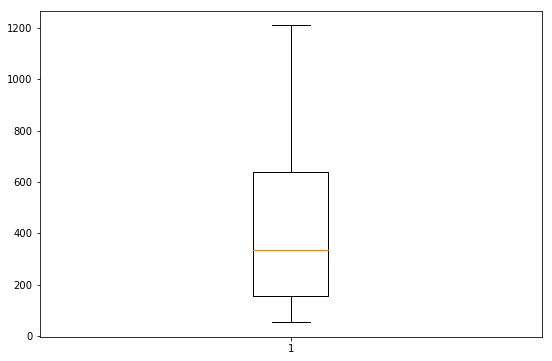

In [50]:
def box_plot(values):
    fig = plt.figure(1, figsize=(9, 6))
    ax = fig.add_subplot(111)
    bp = ax.boxplot(values.flatten())


# Mumford 2009: Average over voxels within the interquartile of the nonzero between-study variances

q75, q25 = np.percentile(tau2[tau2>0], [75 ,25])
iqr = q75 - q25

# interquartile of the nonzero between-study variances
# boxplot(tau2[tau2>0])
box_plot(tau2[(tau2<=q75) & (tau2>=q25)])

within_interquartile = np.nonzero((tau2<=q75) & (tau2>=q25))

[   30.28869057    26.63625145    18.81457329    20.90049362   874.75335693
   965.30450439  1193.046875    1762.8984375   1323.6854248   2307.5012207
  1425.92871094   326.2166748     55.74742126    74.05918884  2310.58349609
  1982.34204102  1687.75524902  1655.80090332   279.61077881   586.33416748
   385.56600952]
18.814573288
2310.58349609
74.0591888428
1655.80090332


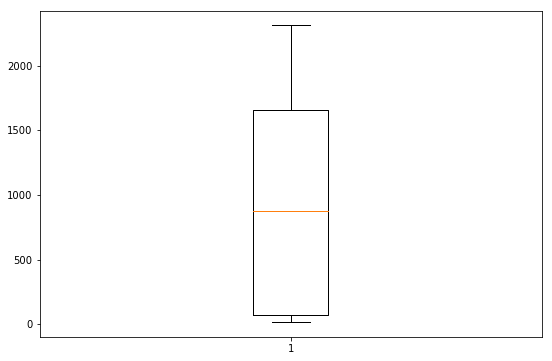

In [58]:
num_studies = si2.shape[3]
summary_si2 = np.zeros(num_studies)

for study in range(num_studies):
    this_study_si2 = si2[...,study]
    summary_si2[study] = np.mean(this_study_si2[within_interquartile])
    
print(summary_si2)
#     (tau2<=q75) & (tau2>=q25)
box_plot(summary_si2)

print(min(summary_si2))
print(max(summary_si2))

q75, q25 = np.percentile(summary_si2, [75 ,25])
iqr = q75 - q25
print(q25)
print(q75)

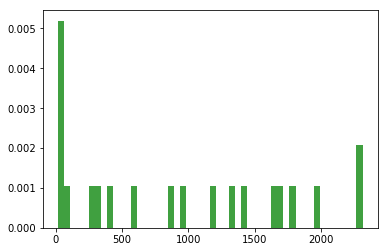

In [55]:
n, bins, patches = plt.hist(summary_si2.flatten(), 50, normed=1, facecolor='g', alpha=0.75)

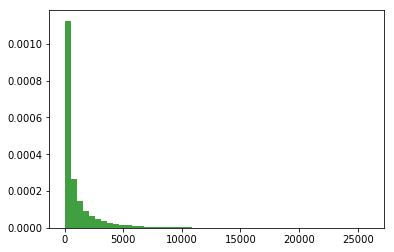

In [36]:
n, bins, patches = plt.hist(tau2[tau2>0].flatten(), 50, normed=1, facecolor='g', alpha=0.75)

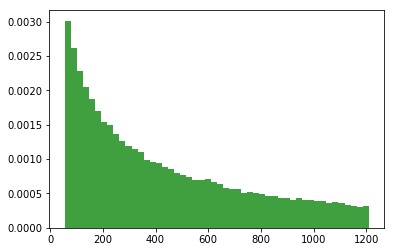

In [37]:
n, bins, patches = plt.hist(tau2[(tau2<=q75) & (tau2>=q25)].flatten(), 50, normed=1, facecolor='g', alpha=0.75)